<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,53.828269,97.675712,28.612476,53.319509,-0.001683,243.434283,243.431008,0.003274
1,0.0,1.0,26.505350,72.775129,64.715117,21.789904,0.008049,195.793550,195.783765,0.009785
2,0.0,2.0,38.510866,20.517617,72.555865,50.355564,0.025967,191.965880,191.946886,0.018994
3,0.0,3.0,58.787577,41.176799,95.862169,28.579330,0.001619,234.407494,234.409916,-0.002422
4,0.0,4.0,41.790841,51.808352,70.999396,62.488652,-0.003512,237.083728,237.090014,-0.006286
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,85.046239,92.977769,47.873956,34.223977,-0.002964,270.118976,270.119817,-0.000840
19996,999.0,16.0,49.290735,21.336979,42.287864,62.291877,-0.004105,185.203349,185.205446,-0.002097
19997,999.0,17.0,95.177446,50.053854,22.267944,45.191064,-0.002023,222.688285,222.686679,0.001606
19998,999.0,18.0,33.155001,70.229599,34.973368,22.095492,-0.001745,170.451714,170.450244,0.001470


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    53.828269  97.675712  28.612476  53.319509 -0.001683  243.434283   
      1.0    26.505350  72.775129  64.715117  21.789904  0.008049  195.793550   
      2.0    38.510866  20.517617  72.555865  50.355564  0.025967  191.965880   
      3.0    58.787577  41.176799  95.862169  28.579330  0.001619  234.407494   
      4.0    41.790841  51.808352  70.999396  62.488652 -0.003512  237.083728   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   85.046239  92.977769  47.873956  34.223977 -0.002964  270.118976   
      16.0   49.290735  21.336979  42.287864  62.291877 -0.004105  185.203349   
      17.0   95.177446  50.053854  22.267944  45.191064 -0.002023  222.688285   
      18.0   33.155001  70.229599  34.973368  22.095492 -0.001745  170.451714   
      19.0   54.453066  40.903471  57.526672  68.830798  0.008528  231.722535   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    243.431008  0.003274  
      1.0    195.783765  0.009785  
      2.0    191.946886  0.018994  
      3.0    234.409916 -0.002422  
      4.0    237.090014 -0.006286  
...                 ...       ...  
999.0 15.0   270.119817 -0.000840  
      16.0   185.205446 -0.002097  
      17.0   222.686679  0.001606  
      18.0   170.450244  0.001470  
      19.0   231.713492  0.009042  

[20000 rows x 8 columns]

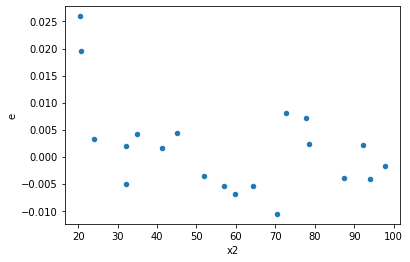

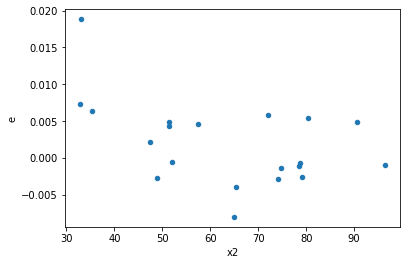

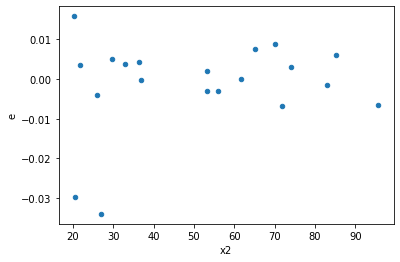

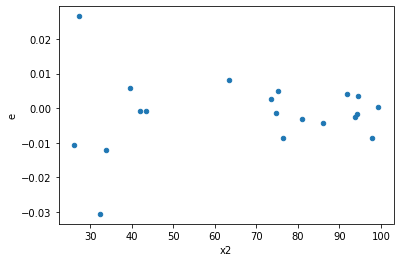

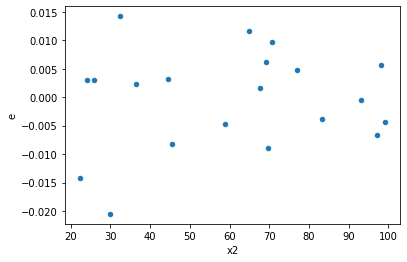

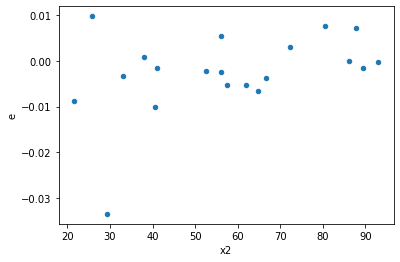

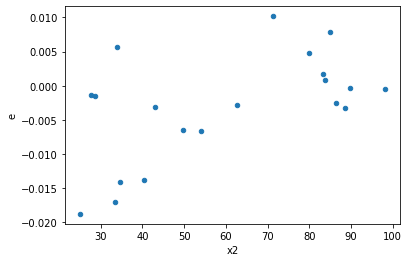

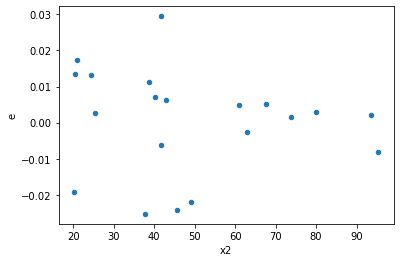

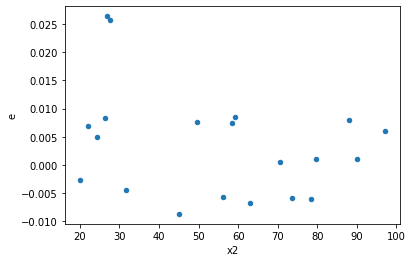

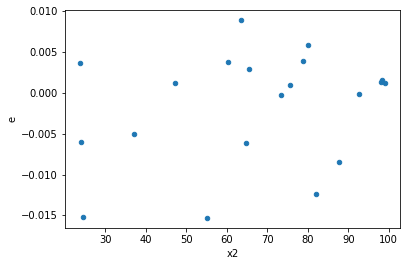

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,4.0,4.0,2.0709550165650756e-05,0.00015588867793673753,5.177387541412689e-06,3.897216948418438e-05,7.527381169065535,0.07606173807225591,0.961969130963872,0.03803086903612796,Reject005=1 : Homoscedasticity
14.0,4.0,4.0,6.550855946252119e-05,8.194874858691421e-05,1.6377139865630297e-05,2.0487187146728553e-05,1.2509624583303316,0.833456164975346,0.583271917512327,0.416728082487673,Reject005=1 : Homoscedasticity
15.0,4.0,4.0,3.5588087365836407e-05,3.978678831660953e-05,8.897021841459102e-06,9.946697079152382e-06,1.1179805171211241,0.9165300484907632,0.5417349757546184,0.4582650242453816,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,0.0001242619806960691,0.00013240283440931017,3.106549517401728e-05,3.310070860232754e-05,1.0655136323084426,0.9524391933960468,0.5237804033019766,0.4762195966980234,Reject005=1 : Homoscedasticity
29.0,4.0,4.0,0.00016501222692538893,0.00027619903736015466,4.125305673134723e-05,6.904975934003866e-05,1.6738095261573518,0.6299964995416407,0.6850017502291796,0.31499824977082036,Reject005=1 : Homoscedasticity
40.0,4.0,4.0,3.432935277156851e-05,0.00015420361620918394,8.582338192892128e-06,3.8550904052295985e-05,4.491888246052079,0.1747847099181865,0.9126076450409067,0.08739235495909325,Reject005=1 : Homoscedasticity
45.0,4.0,4.0,5.391245313355771e-05,6.902094672466298e-05,1.3478113283389427e-05,1.7255236681165745e-05,1.280241256202475,0.8165784213825344,0.5917107893087328,0.4082892106912672,Reject005=1 : Homoscedasticity
51.0,4.0,4.0,4.762756271069979e-05,0.00012475703654942386,1.1906890677674947e-05,3.1189259137355965e-05,2.6194293692336372,0.37364526120169606,0.813177369399152,0.18682263060084803,Reject005=1 : Homoscedasticity
52.0,4.0,4.0,3.293625835035279e-05,6.804047086739948e-05,8.234064587588197e-06,1.701011771684987e-05,2.0658227216835843,0.49953811715378826,0.7502309414231059,0.24976905857689413,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.0004133646336265558,0.00018801039414663128,0.00010334115840663895,4.700259853665782e-05,0.4548294141595207,0.4642131842521696,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,5.9933914645854556e-05,3.936965831339558e-06,1.4983478661463639e-05,9.842414578348894e-07,0.06568844792806915,0.02185975247819453,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,0.0006615961984220871,7.047013907783273e-05,0.00016539904960552178,1.7617534769458182e-05,0.10651533253350706,0.0520301938274182,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.0016421533356444286,0.00010014844501780472,0.00041053833391110716,2.503711125445118e-05,0.060986049745776975,0.019064408373829198,Reject005=0 : Heteroscedasticity
4.0,4.0,4.0,0.000515913733689138,0.0002586932476886696,0.0001289784334222845,6.46733119221674e-05,0.5014273332846462,0.5202093669128133,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.0009502550039265032,3.754973699284977e-05,0.0002375637509816258,9.387434248212443e-06,0.039515432002664864,0.008450355774260999,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,0.0005367441821056955,1.5019351424944032e-05,0.00013418604552642386,3.754837856236008e-06,0.027982327383636974,0.0043650985481735365,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,0.0004424490780119057,0.00012588971097520052,0.00011061226950297643,3.147242774380013e-05,0.2845292650193137,0.2509140648620594,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,0.0005638502745634008,3.343103517711885e-05,0.0001409625686408502,8.357758794279713e-06,0.05929062498551604,0.018095783933155148,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      553
Reject005=0 : Heteroscedasticity    447
Name: Result_test, dtype: int64